In [17]:
import numpy as np
import pandas as pd
import cv2
import random
import csv
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter
%matplotlib inline

In [3]:
base_path = '../../datasets/german_traffic_signs/'
train_path = base_path + 'imgs/train'
test_path = base_path + 'imgs/test'

In [4]:
imgpaths = [os.path.join(root, f).replace('\\', '/')
            for root, _, files in os.walk(train_path) 
            for f in files if f.endswith('.ppm')]
random.shuffle(imgpaths)

In [5]:
from sklearn.model_selection import train_test_split
train, valid = train_test_split(imgpaths, test_size=0.1, random_state=42)

n_train, n_valid = len(train), len(valid)
n_classes = len(list(open(base_path + 'signnames.csv'))) - 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of classes =", n_classes)

Number of training examples = 35288
Number of validation examples = 3921
Number of classes = 43


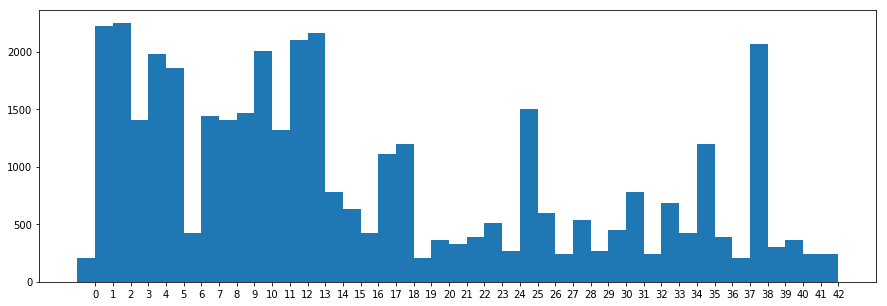

In [24]:
cls_counter = Counter()
for path in imgpaths:
    cls = int(path.split('/')[-2])
    cls_counter[cls] += 1
    
labels, values = cls_counter.keys(), cls_counter.values()
indexes = np.arange(len(labels))

plt.figure(figsize=(15,5))
plt.bar(indexes, values, width=1)
plt.xticks(indexes + 0.5, labels)
plt.show()

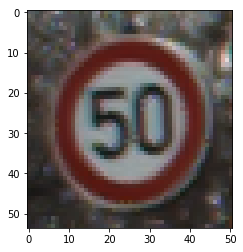

In [15]:
b, g, r = cv2.split(cv2.imread(imgpaths[0]))
rgb = cv2.merge([r, g, b])
plt.imshow(rgb)